# Perceptron:
Perceptron is a single unit of ANN (Artificial Neural Network), It can also be multi layer. It can be also called `TLU` (Threshold Logic Unit).

* Its the simplest ANN architecture. It was invented by Frank Rosenblatt in 1957 and published as `Rosenblatt, Frank (1958), The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain, Cornell Aeronautical Laboratory, Psychological Review, v65, No. 6, pp. 386–408. doi:10.1037/h0042519`
* It has different architecture then the first neuron that we have seen above. Its known as threshold logic unit(TLU) or linear threshold unit (LTU).
* Here inputs are not just binary. 
* Lets see the architecture shown below - 
    <a title="Chrislb / CC BY-SA (http://creativecommons.org/licenses/by-sa/3.0/)" href="https://commons.wikimedia.org/wiki/File:ArtificialNeuronModel_english.png"><img width="1024" alt="ArtificialNeuronModel english" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/1024px-ArtificialNeuronModel_english.png"></a>





* Common activation functions used for Perceptrons are (with threshold at 0)
 - $\phi(z) = \begin{cases}
+1 & \text{ if } z \geq \theta \\ 
-1 & \text{ if } z< \theta 
\end{cases}$


* These activation function are **anologous to firing of neurotransmitter** at a specific threshold

- Net input $$z = x_1.w_1+x_2.w_2+x_3.w_3+...+x_n.w_n$$
or $$z= \sum_{i=1}^{n} x_i.w_i $$

- Activation: $$\phi (z)$$

* Perceptron learning Rule: 
$W_i,_j \leftarrow W_i,_j \leftarrow + \eta (y_j - \hat{y})x_i$
    where,
    * $w_{i,j}$ : connection weight between $i^{th}$ input neuron and $j^{th}$ output neuron
    * $x_i$ : $i^{th}$ input value.
    * $\hat{y_j}$ : output of $j^{th}$ output neuron
    * $y_j$ : target output of $j^{th}$ output neuron
    * $\eta$ : learning rate
    
* It can also be written as for jth element of w vector 
    $$w_j = w_j + \triangle w_j$$
    $$where,\ \triangle w_j =  \eta(y^{(i)} - \hat{y_j}^{(i)})x_j^{(i)}$$
                         

In [1]:
import numpy as np
import matplotlib.pyplot as plt

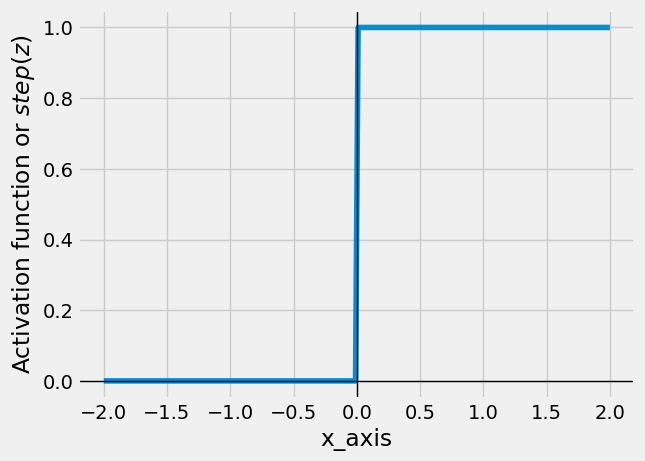

In [2]:
plt.style.use("fivethirtyeight")

x_axis = np.linspace(-2,2,200)
step = np.where(x_axis < 0, 0, 1)

plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"Activation function or $step(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

## Derivation:- 

Let's assume that you are doing a binary classification with class +1 and -1

Let there be decision function $\phi (z)$ 

which takes linear combination of certain inputs "$\mathbf{x}$" 

corresponding weights "$\mathbf{w}$" and net input $\mathbf{z} = w_1 x_1 + w_2 x_2 + ... + w_n x_n$


So in vector form we have 

$\begin{matrix}
\mathbf{w} = \begin{bmatrix}
w_1\\ 
\vdots\\ 
w_n\end{bmatrix}&&
\mathbf{x} = \begin{bmatrix}
x_1\\ 
\vdots\\ 
x_n\end{bmatrix}\end{matrix}$


so  $\mathbf{z = w^T x}$


Now, if 

for a sample $\mathbf{x}$

$\phi(z) = \begin{cases}
+1 & \text{ if } z \geq \theta \\ 
-1 & \text{ if } z< \theta 
\end{cases}$

Lets simplify the above equation - 

$\phi(z) = \begin{cases}
+1 & \text{ if } z - \theta \geq 0\\ 
-1 & \text{ if } z - \theta < 0
\end{cases}$

Suppose, $$w_0 = \theta$$
and$$x_0 =-1 $$

Then, 

$\mathbf{z'} = w_0 x_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$

and 

$\phi(z) = \begin{cases}
+1 & \text{ if } z \geq 0\\ 
-1 & \text{ if } z < 0
\end{cases}$

here $w_0 x_0$ is usually known as bias unit

![](https://sebastianraschka.com/images/faq/classifier-history/perceptron-figure.png)


# Advantages & Disadvantages of Perceptron:
### Advantages:
- Single layer Perceptrons can learn only linearly separable patterns
- Easy to implement
- Low computation power
-Perceptrons can implement Logic Gates like AND, OR.

### Disadvantages:
- Perceptron networks have several limitations.
- The output values of a perceptron can take on only one of two values (0 or 1) due to the hard-limit activation function
- Here we just use the step function as an activation.
- Perceptrons can only classify linearly separable sets of vectors.

# Implementation of Perceptron with Python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

In [4]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights)
    return np.where(z > 0 , 1, 0)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights)
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)

# AND Operation:

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

In [5]:
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X = AND.drop("y", axis=1) 
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [7]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [8]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [3.65257297e-05 1.14713613e-04 9.29065522e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 3.65257297e-05 -4.99885286e-01  5.00092907e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[5.00036526e-01 1.14713613e-04 9.29065522e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[ 3.65257297e-05 -4.99885286e-01  1.00009291e+00]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[5.00036526e-01 1.14713613e-04 5.00092907e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[5.00036526e-01 1.1471361

In [9]:
model.predict(X)

array([0, 0, 0, 1])

In [10]:
model.weights

array([5.00036526e-01, 1.14713613e-04, 5.00092907e-01])

# Saving and Loading model

In [11]:
import os

# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model\\AND_model.model']

In [12]:
# load the model from drive
loaded_model = joblib.load(filename)
result = loaded_model.predict(X)
print(result)

[0 0 0 1]


# OR Operation:

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

In [13]:
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [14]:
X = OR.drop("y", axis=1) 
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [15]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [16]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [-1.04452447e-04  2.41720140e-05 -1.48667895e-04]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[-1.04452447e-04  2.41720140e-05  4.99851332e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 0.99989555  1.00002417 -1.00014867]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.99989555  1.00002417 -0.50014867]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 9.99895548e-01  1.00002417e+00 -1.48667895e-04]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.99989555 1.00002417 0.49985133]
#####

# XOR Operation:

In [17]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

In [18]:
XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [19]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [20]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [21]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [-8.30260241e-05  2.37232150e-05 -6.86767914e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 1 0 1]
error: 
0   -1
1    0
2    1
3   -1
Name: y, dtype: int64
updated weights: 
[-8.30260241e-05 -4.99976277e-01  4.99931323e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99916974e-01  2.37232150e-05 -5.00068677e-01]
#############

for epoch: 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-8.30260241e-05 -4.99976277e-01  4.99931323e-01]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99916974e-01  2.37232150e-05 -5.00068677e-01]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-8.30260241e-05

In [22]:
model.predict(X)

array([1, 1, 1, 1])

# Analysis with the graph

## AND GATE

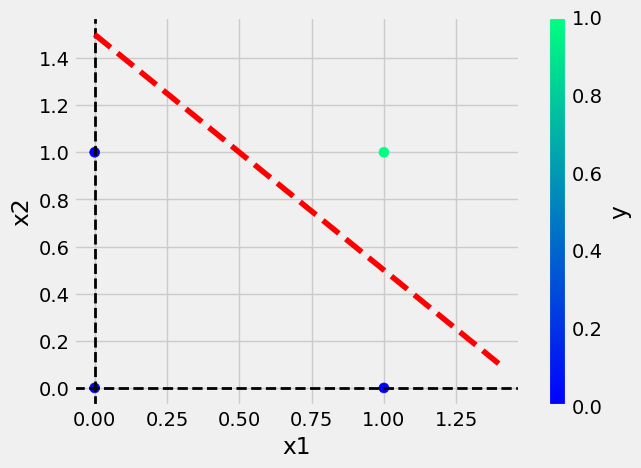

In [23]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

# OR GATE

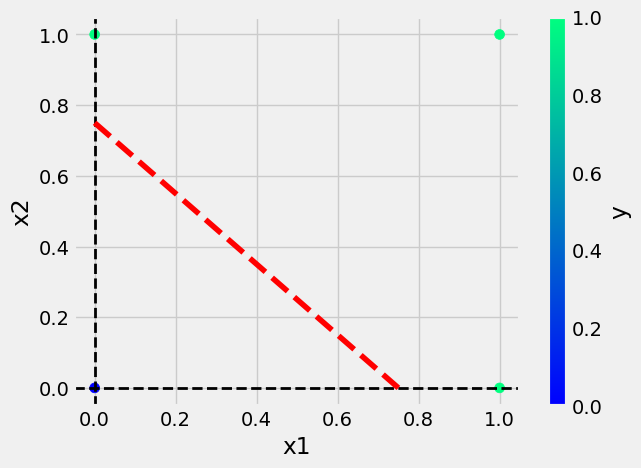

In [24]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

# XOR GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

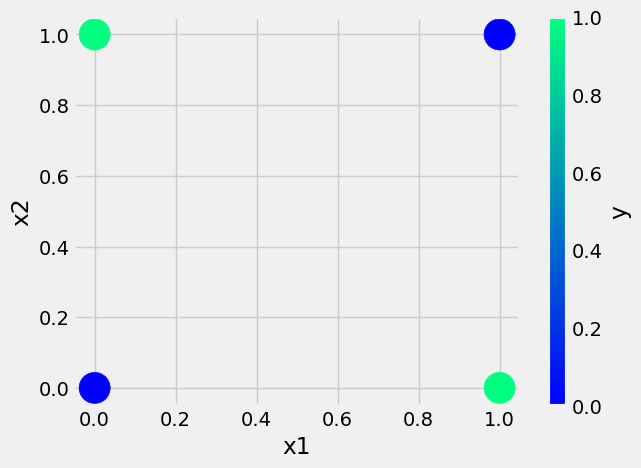

In [25]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")

# Conclution:
Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. 